In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
x_length = 0.3
dr = 0.01
n_x = int(x_length / dr) + 1

y_length = 0.2
n_y = int(y_length / (dr * np.sin(np.pi/3))) + 1

x = np.linspace(0, x_length, n_x, endpoint=True).reshape(1,-1)
for i_y in range(n_y-1):
    if i_y%2 == 1:
        x = np.vstack((x, np.linspace(0, x_length, n_x, endpoint=True).reshape(1,-1)))
    else:
        x = np.vstack((x, np.linspace(0+(dr/2), x_length+(dr/2), n_x, endpoint=True).reshape(1,-1)))
x = x.T


y = np.linspace(0, y_length, n_y, endpoint=True).reshape(1,-1)
for i_x in range(n_x-1):
    y = np.vstack((y, np.linspace(0, y_length, n_y, endpoint=True).reshape(1,-1)))

t_length = 500.
dt = 0.05
n_t = int(t_length / dt)
# Constants
alpha = 1e-5
# Initial/Boundary conditions
T_all_init = 100
T_source = 0

In [3]:
T_new = np.ones(shape=(n_x, n_y)) * T_all_init
Ts = [T_new]

for i_t in range(n_t):
    T_new = np.zeros(shape=(n_x, n_y))
    for i_x in range(1, n_x-1):
        d2T_dr2_1 = (Ts[i_t][i_x,2:] - 2 * Ts[i_t][i_x,1:-1] + Ts[i_t][i_x,:-2]) / dr**2
        if i_x%2 == 1:
            d2T_dr2_2 = (Ts[i_t][i_x-1,2:] - 2 * Ts[i_t][i_x,1:-1] + Ts[i_t][i_x+1,1:-1]) / dr**2
            d2T_dr2_3 = (Ts[i_t][i_x+1,2:] - 2 * Ts[i_t][i_x,1:-1] + Ts[i_t][i_x-1,1:-1]) / dr**2
        else:
            d2T_dr2_2 = (Ts[i_t][i_x-1,1:-1] - 2 * Ts[i_t][i_x,1:-1] + Ts[i_t][i_x+1,:-2]) / dr**2
            d2T_dr2_3 = (Ts[i_t][i_x+1,1:-1] - 2 * Ts[i_t][i_x,1:-1] + Ts[i_t][i_x-1,:-2]) / dr**2
        T_new[i_x,1:-1] = Ts[i_t][i_x,1:-1] + alpha * dt * (d2T_dr2_1 + d2T_dr2_2 + d2T_dr2_3)
    # Boundary conditions
    T_new[0,:] = T_new[1,:]
    T_new[:,0] = T_new[:,1]
    T_new[-1,:] = T_new[-2,:]
    T_new[:,-1] = T_new[:,-2]
    T_new[(n_x//2):(n_x//2)+2, :2] = T_source
    Ts.append(T_new)

del Ts[0]

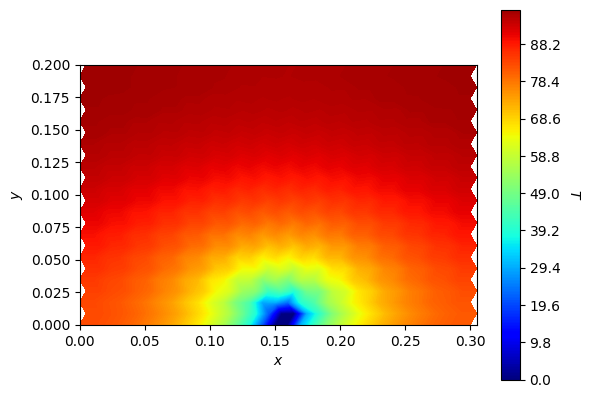

In [4]:
time_step = n_t - 1

fig, ax = plt.subplots(dpi=100)

cs = ax.contourf(x, y, Ts[time_step], 500, cmap=cm.jet, vmin=0, vmax=100)
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel('$T$', rotation=270, labelpad=15)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

fig.savefig('out-hexagonal.jpg', dpi=150, bbox_inches='tight')